In [21]:
import pandas
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [22]:
img=cv2.imread(r'.\natural_images\airplane\airplane_0000.jpg')

In [3]:
img.shape

(104, 300, 3)

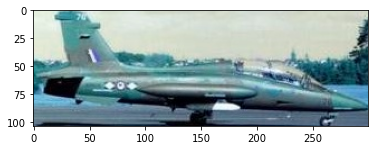

In [4]:
plt.imshow(img)

In [5]:
img

array([[[232, 240, 223],
        [232, 240, 223],
        [233, 241, 224],
        ...,
        [210, 217, 204],
        [211, 218, 205],
        [209, 216, 203]],

       [[230, 238, 221],
        [231, 239, 222],
        [232, 240, 223],
        ...,
        [213, 220, 207],
        [208, 215, 202],
        [210, 217, 202]],

       [[228, 238, 222],
        [229, 239, 223],
        [229, 239, 223],
        ...,
        [209, 214, 199],
        [210, 217, 202],
        [211, 219, 202]],

       ...,

       [[104, 128, 148],
        [103, 127, 147],
        [106, 128, 146],
        ...,
        [ 78, 100, 125],
        [ 79,  99, 124],
        [ 78,  98, 123]],

       [[ 90, 111, 132],
        [ 82, 103, 124],
        [ 75,  94, 115],
        ...,
        [ 88, 109, 136],
        [ 89, 110, 137],
        [ 87, 108, 135]],

       [[ 96, 117, 138],
        [ 85, 106, 127],
        [ 73,  92, 113],
        ...,
        [ 92, 113, 140],
        [ 94, 115, 142],
        [ 92, 113, 140]]

In [6]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(104, 300)

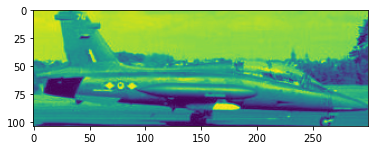

In [7]:
plt.imshow(gray)

In [8]:
gray

array([[234, 234, 235, ..., 212, 213, 211],
       [232, 233, 234, ..., 215, 210, 212],
       [232, 233, 233, ..., 209, 212, 213],
       ...,
       [131, 130, 131, ..., 105, 104, 103],
       [115, 107,  98, ..., 115, 116, 114],
       [121, 110,  96, ..., 119, 121, 119]], dtype=uint8)

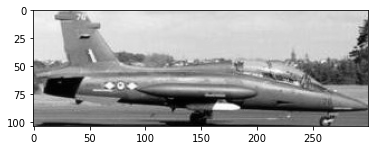

In [9]:
plt.imshow(gray,cmap='gray')

In [23]:
# now we would store path of individuals subfolders into a python list with the help of python 'os' module.
path_to_data = "./natural_images/" 
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [4]:
img_dirs

['./natural_images/airplane',
 './natural_images/car',
 './natural_images/cat',
 './natural_images/dog',
 './natural_images/flower',
 './natural_images/fruit',
 './natural_images/motorbike',
 './natural_images/person']

In [24]:
images_file_names=[]
# Here we are going to iterate through all images first ↓
for img_dir in img_dirs:     
    image_name = img_dir.split('/')[-1]
    print(image_name)
    images_file_names.append(image_name)
images_file_names

airplane
car
cat
dog
flower
fruit
motorbike
person


['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [25]:
import pywt
def w2d(img,mode="haar",level=1):
    imArray=img
    #datatype conversion
    #convert to gray scale
    imArray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray/=255
    #compute coefficient
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    #process coeff
    coeff_H=list(coeffs)
    coeff_H[0]*=0;
    #reconstruction
    imArray_H=pywt.waverec2(coeff_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    return imArray_H  

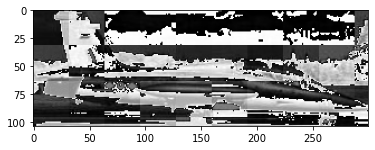

In [26]:
im_har=w2d(img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [27]:
image_file_names_dict = {}
for img_dir in img_dirs:
    image_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    image_file_names_dict[image_name] = file_list
image_file_names_dict

{'airplane': ['./natural_images/airplane\\airplane_0000.jpg',
  './natural_images/airplane\\airplane_0001.jpg',
  './natural_images/airplane\\airplane_0002.jpg',
  './natural_images/airplane\\airplane_0003.jpg',
  './natural_images/airplane\\airplane_0004.jpg',
  './natural_images/airplane\\airplane_0005.jpg',
  './natural_images/airplane\\airplane_0006.jpg',
  './natural_images/airplane\\airplane_0007.jpg',
  './natural_images/airplane\\airplane_0008.jpg',
  './natural_images/airplane\\airplane_0009.jpg',
  './natural_images/airplane\\airplane_0010.jpg',
  './natural_images/airplane\\airplane_0011.jpg',
  './natural_images/airplane\\airplane_0012.jpg',
  './natural_images/airplane\\airplane_0013.jpg',
  './natural_images/airplane\\airplane_0014.jpg',
  './natural_images/airplane\\airplane_0015.jpg',
  './natural_images/airplane\\airplane_0016.jpg',
  './natural_images/airplane\\airplane_0017.jpg',
  './natural_images/airplane\\airplane_0018.jpg',
  './natural_images/airplane\\airplane

In [10]:
image_file_names_dict.keys()

dict_keys(['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person'])

In [37]:
Value_With_Name = {}
count = 0
for image_name in image_file_names_dict.keys():
    Value_With_Name[image_name] = count
    count = count + 1
Value_With_Name

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

# We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [38]:
X, y = [], []
for image_name, training_files in image_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(Value_With_Name[image_name])

In [39]:
len(X[0])

4096

In [40]:
# logic behind len
32*32*3 + 32*32

4096

In [41]:
X[0]


array([[232],
       [240],
       [223],
       ...,
       [ 13],
       [ 10],
       [ 32]], dtype=uint8)

In [42]:
y[0]


0

In [43]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(6899, 4096)

# Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned with heuristic finetuning

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8359420289855073

In [46]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       184
           1       0.89      0.93      0.91       222
           2       0.61      0.64      0.62       239
           3       0.49      0.44      0.46       177
           4       0.75      0.78      0.77       212
           5       0.99      1.00      1.00       255
           6       0.94      0.93      0.94       195
           7       0.99      1.00      0.99       241

    accuracy                           0.84      1725
   macro avg       0.83      0.82      0.83      1725
weighted avg       0.83      0.84      0.83      1725



In [47]:
pred=pipe.predict(X_test)

In [48]:
pred

array([7, 3, 2, ..., 0, 6, 6])

In [57]:
Value_With_Name = {}
count = 0
for image_name in image_file_names_dict.keys():
    Value_With_Name[count] = image_name
    count = count + 1
Value_With_Name

{0: 'airplane',
 1: 'car',
 2: 'cat',
 3: 'dog',
 4: 'flower',
 5: 'fruit',
 6: 'motorbike',
 7: 'person'}

In [59]:
#values predicted by our model↓
predicted=[]
for i in pred[:11]:
    for val in Value_With_Name.keys():
        if i==val:
            predicted.append(Value_With_Name[val])
predicted

['person',
 'dog',
 'cat',
 'fruit',
 'cat',
 'fruit',
 'cat',
 'dog',
 'cat',
 'dog',
 'person']

In [60]:
true_Name=[]
for i in y_test[:11]:
    for val in Value_With_Name.keys():
        if i==val:
            true_Name.append(Value_With_Name[val])
true_Name

df=pandas.DataFrame(true_Name)
df.columns=["Actual_Value"]
df['Predicted_values']=predicted

In [61]:
df=pandas.DataFrame(true_Name)
df.columns=["Actual_Value"]
df['Predicted_values']=predicted

In [62]:
from tabulate import tabulate
print(tabulate(df, headers=["Actual_Values","Predicted_values"],tablefmt = 'fancy_grid',showindex='None'))

╒═════════════════╤════════════════════╕
│ Actual_Values   │ Predicted_values   │
╞═════════════════╪════════════════════╡
│ person          │ person             │
├─────────────────┼────────────────────┤
│ dog             │ dog                │
├─────────────────┼────────────────────┤
│ cat             │ cat                │
├─────────────────┼────────────────────┤
│ fruit           │ fruit              │
├─────────────────┼────────────────────┤
│ dog             │ cat                │
├─────────────────┼────────────────────┤
│ fruit           │ fruit              │
├─────────────────┼────────────────────┤
│ dog             │ cat                │
├─────────────────┼────────────────────┤
│ motorbike       │ dog                │
├─────────────────┼────────────────────┤
│ airplane        │ cat                │
├─────────────────┼────────────────────┤
│ dog             │ dog                │
├─────────────────┼────────────────────┤
│ person          │ person             │
╘═══════════════

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[162,   4,   6,   6,   4,   1,   1,   0],
       [  3, 206,   7,   1,   2,   1,   2,   0],
       [  1,  11, 154,  47,  23,   0,   3,   0],
       [  0,   7,  69,  77,  19,   0,   2,   3],
       [  2,   4,  16,  21, 166,   0,   3,   0],
       [  0,   0,   0,   0,   0, 255,   0,   0],
       [  1,   0,   2,   4,   6,   0, 182,   0],
       [  0,   0,   0,   0,   1,   0,   0, 240]], dtype=int64)

Text(69.0, 0.5, 'True_Values')

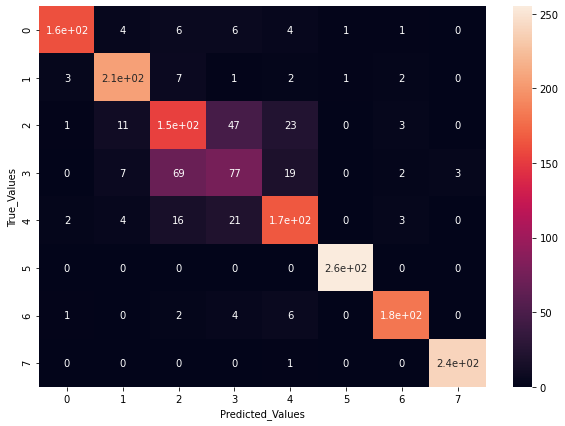

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted_Values')
plt.ylabel('True_Values')

# Thats all from me , Thank you .